In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
adult_df=pd.read_csv(r'adult_data.csv',header=None,delimiter=' *, *')
adult_df.head()

#no column header so header=0
#delimter is a special kind of delimiter so that extra space ko nikal pae


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [5]:
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
adult_df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### pre process the data

In [8]:
#create a copy of the dataframe so that if i messed up something in between and want my origianl data back i can access it
adult_df_rev=pd.DataFrame.copy(adult_df)

In [9]:
adult_df_rev.drop(['education','fnlwgt'],axis=1,inplace=True)
adult_df_rev.shape

(32561, 13)

In [10]:
#Check is there any null value in the dataset
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
#As we know in our dataset missing value is not in the form of blanks it is in the form of question mark(?)

In [12]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

#### isse pata chalta hai ki jaise age column me sab number hi hai to int dikhaega agar ek bhi character raha to datatype int se change hokar object ho jaega jaise age me to numeric hona chahiye tha to object kaise aaya iska matlab bich me kuch to error hai

In [13]:
# to check unique values in each columns
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [14]:
# to check duplicate value
adult_df_rev.duplicated().sum()

3465

In [15]:
#Dropping the duplicates and check the shape of the dataset
adult_df_rev.drop_duplicates(inplace=True)
adult_df_rev.shape

(29096, 13)

In [16]:
adult_df_rev.replace('?',np.nan,inplace=True)

In [17]:
adult_df_rev.isnull().sum()

age                  0
workclass         1632
education_num        0
marital_status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     580
income               0
dtype: int64

In [18]:
#replace the missing values with mode values
for i in ['workclass','occupation','native_country']:
    adult_df_rev[i].fillna(adult_df_rev[i].mode()[0],inplace=True)

In [19]:
adult_df_rev.workclass.mode()[0]

'Private'

In [20]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [21]:

'''for x in adult_df_rev.columns:
        if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
            adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
        elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
            adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
'''
#when to use:-jab columns jyada hoga to ek ek karne se acha hum usko fill  karenge for loop se datatypes ka use karke


"for x in adult_df_rev.columns:\n        if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n            adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n        elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n            adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

### Dummy variables using pd.get_dummies()

In [22]:
adult_df_rev_new=pd.get_dummies(adult_df_rev)   #drop_first=True dalenge to kuch columns ko oo delete karta hai logically but bahot kam
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
adult_df_rev_new.shape      #as we can see number of columns increase drastically

(29096, 90)

In [24]:
'''
#This is manual types each column name having datatype object...but hame aise nahi karna hai hum for loop se karenge jaise niche kiya hai
colname=['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']
 '''

"\n#This is manual types each column name having datatype object...but hame aise nahi karna hai hum for loop se karenge jaise niche kiya hai\ncolname=['workclass',\n 'marital_status',\n 'occupation',\n 'relationship',\n 'race',\n 'sex',\n 'native_country',\n 'income']\n "

In [25]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [26]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
   
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    

#target varibale ko usne kya label diya hai oo important hai

Feature workclass
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
Feature marital_status
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Feature occupation
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
Feature relationship
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
Feature race
mapping {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
Feature sex
mapping {'Female': 0, 'Male': 1}
Feature native_country
mapping {'Cambodia': 0, 'Canada'

In [27]:
adult_df_rev.head()

#0--> <=50K
#1--> >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [28]:
#.values is used to convert dataframe into array because arrays are lightweight also kernel process it faster 
X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]
print(X.shape)
print(Y.shape)

(29096, 12)
(29096,)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X=scaler.transform(X)
#X_new=scaler.fit_transform(X)   #Avoid writing this fit and transform code in single line while Scaling
#print(X_new)

In [30]:
print(X)

[[-0.01836354  2.50168388  1.09532824 ... -0.22918623 -0.05008321
   0.27686061]
 [ 0.78532337  1.63827296  1.09532824 ... -0.22918623 -2.17019141
   0.27686061]
 [-0.09142599 -0.08854888 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]
 ...
 [-0.8951129  -0.08854888  0.71727758 ... -0.22918623 -0.20712826
   0.27686061]
 [ 1.36982294 -0.08854888 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]
 [ 0.93144826  0.77486204 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]]


In [31]:
Y.dtype

dtype('int64')

In [32]:
Y=Y.astype(int)

### Running a Basic model

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [34]:
print(X_train.shape)
print()
print(Y_train.shape)
print()

print(X_test.shape)
print()
print(Y_test.shape)


(20367, 12)

(20367,)

(8729, 12)

(8729,)


In [35]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()   #create a model

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

print(Y_pred)


[0 1 0 ... 0 0 0]


In [36]:
print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:-1],model.coef_.ravel())))
#print(model.intercept_)
#print(model.coef_)

[(0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0),

In [37]:
model.predict_proba(X_test)

array([[0.98156056, 0.01843944],
       [0.33724397, 0.66275603],
       [0.56244389, 0.43755611],
       ...,
       [0.77101923, 0.22898077],
       [0.76532832, 0.23467168],
       [0.95115773, 0.04884227]])

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,Y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6178  372]
 [1211  968]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8186504754267384


### Adjusting the threshold

In [39]:
#store the predicted probabilities 
y_pred_prob=model.predict_proba(X_test)
print(y_pred_prob)

[[0.98156056 0.01843944]
 [0.33724397 0.66275603]
 [0.56244389 0.43755611]
 ...
 [0.77101923 0.22898077]
 [0.76532832 0.23467168]
 [0.95115773 0.04884227]]


#### Adjusting threshold to 0.40

In [40]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)
#This is the block of code to be used to predict upon the unseen data.

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,y_pred_class)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[5906  644]
 [ 973 1206]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6550
           1       0.65      0.55      0.60      2179

    accuracy                           0.81      8729
   macro avg       0.76      0.73      0.74      8729
weighted avg       0.81      0.81      0.81      8729

Accuracy of the model:  0.8147554129911788


#### Adjusting threshold to 0.60

In [42]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,y_pred_class)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[6359  191]
 [1429  750]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6550
           1       0.80      0.34      0.48      2179

    accuracy                           0.81      8729
   macro avg       0.81      0.66      0.68      8729
weighted avg       0.81      0.81      0.79      8729

Accuracy of the model:  0.8144117310115706


In [44]:
# This shows that when you want to improve class 1 the go from 0.4 not 0.6 as we saw in above 

In [45]:
#Here we are checking all the threshold from 0.40 to 0.60 at once
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1617  , type 2 error : 973  , type 1 error: 644
Errors at threshold  0.41000000000000003 : 1602  , type 2 error : 995  , type 1 error: 607
Errors at threshold  0.42000000000000004 : 1595  , type 2 error : 1021  , type 1 error: 574
Errors at threshold  0.43000000000000005 : 1591  , type 2 error : 1042  , type 1 error: 549
Errors at threshold  0.44000000000000006 : 1588  , type 2 error : 1072  , type 1 error: 516
Errors at threshold  0.45000000000000007 : 1583  , type 2 error : 1097  , type 1 error: 486
Errors at threshold  0.4600000000000001 : 1582  , type 2 error : 1126  , type 1 error: 456
Errors at threshold  0.4700000000000001 : 1585  , type 2 error : 1151  , type 1 error: 434
Errors at threshold  0.4800000000000001 : 1582  , type 2 error : 1174  , type 1 error: 408
Errors at threshold  0.4900000000000001 : 1586  , type 2 error : 1194  , type 1 error: 392
Errors at threshold  0.5000000000000001 : 1583  , type 2 error : 1211  , type 1 error: 372
Errors at t

In [46]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,y_pred_class)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[6094  456]
 [1126 1053]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      6550
           1       0.70      0.48      0.57      2179

    accuracy                           0.82      8729
   macro avg       0.77      0.71      0.73      8729
weighted avg       0.81      0.82      0.81      8729

Accuracy of the model:  0.8187650360866079


In [48]:
#Conslusion:-IF want to improve class 1 more then we need more data for class 1.

### When we are confused what should be the value of threshold then auc can help.

In [49]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])  #it returns 3 values that's why we have to pass 3 variable
auc = metrics.auc(fpr,tpr)   #auc-Area under the curve
print(auc)

0.8471623302236126


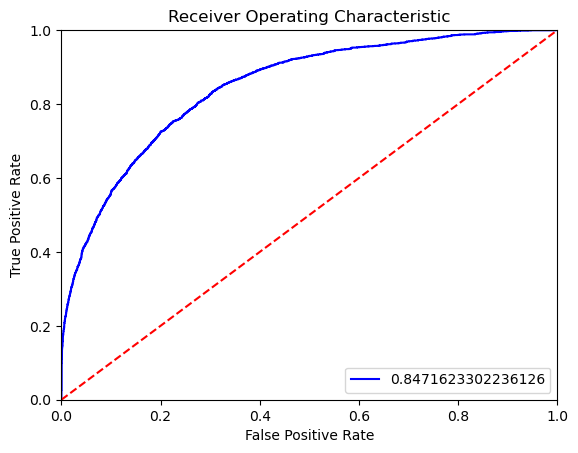

In [50]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')   #loc-location where legend should be
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### Here y_pred_class is 0.46

In [51]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)  #it returns 3 values that's why we have to pass 3 variable
auc = metrics.auc(fpr,tpr)   #auc-Area under the curve
print(auc)
print(fpr)
print(tpr)

0.7068154381343077
[0.         0.06961832 1.        ]
[0.        0.4832492 1.       ]


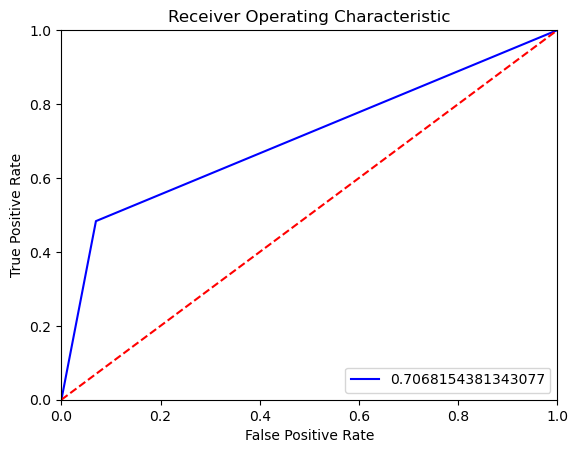

In [52]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')   #loc-location where legend should be
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### AUC:
#### 1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
#### 2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
#### 3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.

#### Here y_pred_class is 0.48

In [53]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.48:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [54]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)  #it returns 3 values that's why we have to pass 3 variable
auc = metrics.auc(fpr,tpr)   #auc-Area under the curve
print(auc)
print(fpr)
print(tpr)

0.6994653335622125
[0.         0.06229008 1.        ]
[0.         0.46122074 1.        ]


### Using Cross validation-K-fold

In [55]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.81492391 0.80805106 0.82032401 0.83799705 0.83210604 0.82621502
 0.82326951 0.82367387 0.82760314 0.80992141]
0.8224085026228911


#### Our base model accuracy was 0.8187 but using cross validation our accuracy score is 0.822 so there is not a major difference between both the scores so we will go with our base model not with expensive cost model k-fold

In [56]:
#TO be implemented where the accuracy score af base model and k-fold is having huge difference
#model tuning

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,Y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6179  371]
 [1205  974]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.70      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8194524000458243


### Using Cross validation-Stratified-fold

In [58]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.8119784  0.81492391 0.82916053 0.82621502 0.81885125 0.82965145
 0.81836033 0.82367387 0.82760314 0.82514735]
0.8225565254963915


#### The Accuracy is approx same for k-fold and stratified k-fold

### RFE-Use to eliminate the variable which is less significant
Disadvantage:-sometimes it elimates the variable which is most important like in below case it eliminates the occupation varibale which was very important to predict the salary,it elimated because that varibale is of categorical type

In [59]:
colname=adult_df_rev.columns

 

from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=10) #varibales retained only 10
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)    #Returns how many columns left
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))     #Returns True which column is retained and False which is eliminated
print("Feature Ranking: ", model_rfe.ranking_)    #Which column is elimited first get bigger number

Num Features:  10
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 1 1 1 3 1 1 1 1 1 1 2]


In [60]:
colname=adult_df_rev.columns

 

from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=0.75) #varibales retained only 75%
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)    #Returns how many columns left
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))     #Returns True which column is retained and False which is eliminated
print("Feature Ranking: ", model_rfe.ranking_)    #Which column is elimited first get bigger number

Num Features:  9
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 1 1 1 4 1 2 1 1 1 1 3]


In [61]:
Y_pred=model_rfe.predict(X_test)

In [62]:
print(Y_pred)

[0 1 0 ... 0 0 0]


In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,Y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6172  378]
 [1215  964]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8175048688280444


In [64]:
#It eliminated the occupation variables which was important so we will add important varibales

In [65]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the vaiables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manuall

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#Define Sequential Forward Selection (sfs)
sffs = SFS(LogisticRegression(),
           k_features="best",
           forward=True,
           scoring = 'accuracy',
           cv = 5)
#Use SFS to select the top features 
feature_names=adult_df_rev.columns[:-1]
sffs.fit(X_train, Y_train)

#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)","[0.802405498281787, 0.803632793323515, 0.79278...",0.798743,"(8,)"
2,"(8, 9)","[0.8087874324987727, 0.8215513009327442, 0.812...",0.811214,"(8, 9)"
3,"(8, 9, 11)","[0.8087874324987727, 0.8208149239077074, 0.809...",0.81033,"(8, 9, 11)"
4,"(2, 8, 9, 11)","[0.8051055473735886, 0.8190967108492881, 0.811...",0.809937,"(2, 8, 9, 11)"
5,"(2, 7, 8, 9, 11)","[0.8215513009327442, 0.8279332351497299, 0.821...",0.820444,"(2, 7, 8, 9, 11)"
6,"(2, 5, 7, 8, 9, 11)","[0.8232695139911634, 0.8264604810996563, 0.823...",0.821574,"(2, 5, 7, 8, 9, 11)"
7,"(2, 5, 7, 8, 9, 10, 11)","[0.8220422189494354, 0.8298969072164949, 0.827...",0.823096,"(2, 5, 7, 8, 9, 10, 11)"
8,"(2, 5, 6, 7, 8, 9, 10, 11)","[0.8247422680412371, 0.832351497299951, 0.8271...",0.824127,"(2, 5, 6, 7, 8, 9, 10, 11)"
9,"(2, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8244968090328915, 0.832351497299951, 0.8271...",0.823783,"(2, 4, 5, 6, 7, 8, 9, 10, 11)"
10,"(1, 2, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8249877270495827, 0.8330878743249878, 0.824...",0.823587,"(1, 2, 4, 5, 6, 7, 8, 9, 10, 11)"


In [67]:
X = adult_df_rev.values[:,[2, 5, 6, 7, 8, 9, 10, 11]]
Y = adult_df_rev.values[:,-1]

In [68]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X=scaler.transform(X)
#X_new=scaler.fit_transform(X)   #Avoid writing this fit and transform code in single line while Scaling
#print(X_new)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

print(X_train.shape)
print()
print(Y_train.shape)
print()

print(X_test.shape)
print()
print(Y_test.shape)

(20367, 8)

(20367,)

(8729, 8)

(8729,)


In [70]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()   #create a model

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

print(Y_pred)

[0 1 0 ... 0 0 0]


In [71]:
print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:-1],model.coef_.ravel())))
#print(model.intercept_)
#print(model.coef_)

model.predict_proba(X_test)

[(0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0),

array([[0.96768369, 0.03231631],
       [0.28382492, 0.71617508],
       [0.51373066, 0.48626934],
       ...,
       [0.58294971, 0.41705029],
       [0.80394354, 0.19605646],
       [0.91241555, 0.08758445]])

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,Y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6235  315]
 [1263  916]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6550
           1       0.74      0.42      0.54      2179

    accuracy                           0.82      8729
   macro avg       0.79      0.69      0.71      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8192232787260855


### Feature selection using Univariate Selection

In [73]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=9)
fit1 = test.fit(X, Y)

colname=adult_df_rev.columns

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X_new = fit1.transform(X)

[6.43514578e+03 8.38585704e-02 2.22392549e+03 9.54508703e+02
 8.88429844e+01 3.15224157e+03 4.00047642e+01 4.63039738e+02
 7.82121650e+07 1.26463193e+06 5.94798702e+03 2.58715403e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [75]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_new)
X=scaler.transform(X_new)
#X_new=scaler.fit_transform(X)   #Avoid writing this fit and transform code in single line while Scaling
#print(X_new)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

print(X_train.shape)
print()
print(Y_train.shape)
print()

print(X_test.shape)
print()
print(Y_test.shape)

(20367, 9)

(20367,)

(8729, 9)

(8729,)


In [77]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()   #create a model

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

print(Y_pred)

[0 1 0 ... 0 0 0]


In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,Y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6175  375]
 [1207  972]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8187650360866079


In [79]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [80]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.3) #indicating that if there is variety less than 20% then drop that variable  #0.25 is still fine threshold not above that
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features.shape[1])  #here it gives output 12 beacuse there is no column whose variety is less that 20%
print(list(zip(adult_df_rev.columns,fit1.get_support())))

[1.87331831e+02 1.34142046e+00 6.99680880e+00 2.36140664e+00
 1.57295807e+01 2.63582948e+00 7.83695921e-01 2.23928894e-01
 6.04987082e+07 1.79776802e+05 1.62185295e+02 4.06168170e+01]
11
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [85]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(features)
X=scaler.transform(features)
#X_new=scaler.fit_transform(X)   #Avoid writing this fit and transform code in single line while Scaling
#print(X_new)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

print(X_train.shape)
print()
print(Y_train.shape)
print()

print(X_test.shape)
print()
print(Y_test.shape)

(20367, 11)

(20367,)

(8729, 11)

(8729,)


In [87]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()   #create a model

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

print(Y_pred)

[0 1 0 ... 0 0 0]


In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(Y_test,Y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6190  360]
 [1237  942]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6550
           1       0.72      0.43      0.54      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.71      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy of the model:  0.8170466261885668
